<a href="https://colab.research.google.com/github/danielrodriguez007/Data_Analysis/blob/main/Waiter_Tips.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [34]:
import numpy as np 
import pandas as pd 
import plotly.express as px 
import plotly.graph_objects as go 
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')

In [35]:
data = pd.read_csv('https://raw.githubusercontent.com/amankharwal/Website-data/master/tips.csv')
data.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


In [36]:
data.isnull().sum()

total_bill    0
tip           0
sex           0
smoker        0
day           0
time          0
size          0
dtype: int64

In [37]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 244 entries, 0 to 243
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   total_bill  244 non-null    float64
 1   tip         244 non-null    float64
 2   sex         244 non-null    object 
 3   smoker      244 non-null    object 
 4   day         244 non-null    object 
 5   time        244 non-null    object 
 6   size        244 non-null    int64  
dtypes: float64(2), int64(1), object(4)
memory usage: 13.5+ KB


In [38]:
np.around(data.describe(),2)

,total_bill,tip,size
count,244.00,244.00,244.00
mean,19.79,3.00,2.57
std,8.90,1.38,0.95
min,3.07,1.00,1.00
25%,13.35,2.00,2.00
50%,17.80,2.90,2.00
75%,24.13,3.56,3.00
max,50.81,10.00,6.00


In [39]:
px.scatter(data, x='total_bill', y = 'tip',
           size = 'size',color='day', trendline = 'ols')

In [40]:
px.scatter(data, x = 'total_bill', y = 'tip',
           color ='sex', size='size', trendline = 'ols')

In [41]:
px.scatter(data, x = 'total_bill', y = 'tip',
           size = 'size', color = 'time', trendline = 'ols')

In [42]:
px.pie(data, values = 'tip', names = 'day', title = 'Days of tips')

In [43]:
px.pie(data, values = 'tip', names = 'sex', title = 'Gender of the persons who gives tip')

In [44]:
px.pie(data, values = 'tip', names = 'smoker', title = 'Tips given for smoker and non-smoker')

In [45]:
px.pie(data, values = 'tip', names ='time', title = 'Tips during time of meal')

In [46]:
data['sex'] = data['sex'].map({"Female":0, "Male":1})
data['smoker'] = data['smoker'].map({"No":0, "Yes":1})
data['day'] = data['day'].map({"Thur":0,"Fri":1, "Sat":2, "Sun":3}) 
data['time'] = data['time'].map({"Lunch":0, "Dinner":1})
data.head

<bound method NDFrame.head of      total_bill   tip  sex  smoker  day  time  size
0         16.99  1.01    0       0    3     1     2
1         10.34  1.66    1       0    3     1     3
2         21.01  3.50    1       0    3     1     3
3         23.68  3.31    1       0    3     1     2
4         24.59  3.61    0       0    3     1     4
..          ...   ...  ...     ...  ...   ...   ...
239       29.03  5.92    1       0    2     1     3
240       27.18  2.00    0       1    2     1     2
241       22.67  2.00    1       1    2     1     2
242       17.82  1.75    1       0    2     1     2
243       18.78  3.00    0       0    0     1     2

[244 rows x 7 columns]>

In [47]:

x = np.array(data[["total_bill", "sex", "smoker", "day", "time", "size"]]) 
y = np.array(data['tip']) 

from sklearn.model_selection import train_test_split 
xtrain, xtest, ytrain, ytest = train_test_split(x, y,
                                                test_size=0.2,
                                                random_state=42)


In [48]:
from sklearn.linear_model import LinearRegression 
model = LinearRegression() 
model.fit(xtrain, ytrain)

LinearRegression()

In [80]:
# features = [[total_bill, "sex", "smoker", "day", "time", "size"]]
features = np.array([[24.50, 1, 0, 0, 1, 4]])
model.predict(features)

array([3.73742609])

In [91]:
X = np.array(data['tip'])
Y = np.array(data['total_bill'])

In [92]:
print(X.shape, '\n', Y.shape)

(244,) 
 (244,)


In [93]:
n = len(X)
sumx = sum(X)
sumy = sum(Y)
sumx2 = sum(X*X)
sumy2 = sum(Y*Y)
sumxy = sum(X*Y)
promx = sumx/n
promy = sumy/n

In [94]:
m = (sumx* sumy -n * sumxy)/(sumx**2 - n * sumx2)  
b = promy - n/promx 
m,b

(4.347714207346629, -61.594084168377535)

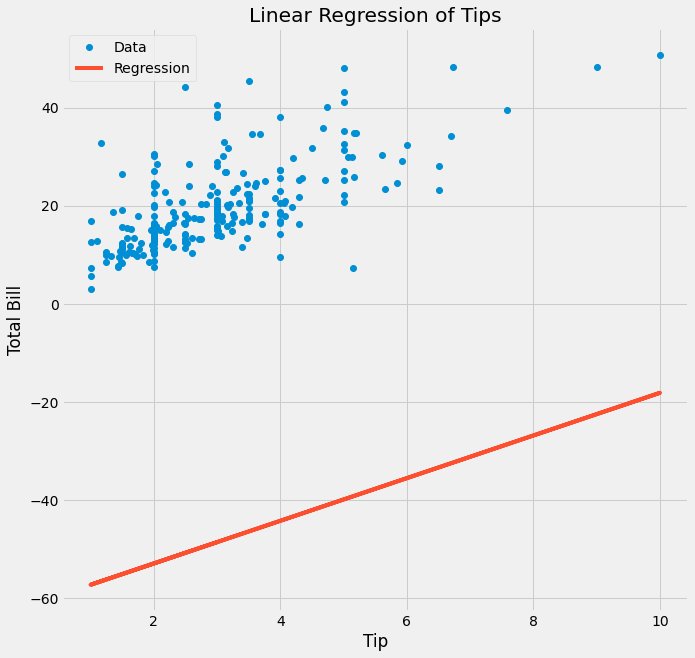

In [95]:
plt.figure(figsize=(10,10))
plt.plot(X, Y, 'o', label = 'Data')
plt.plot(X, m*X+b, label='Regression') 
plt.xlabel('Tip')
plt.ylabel('Total Bill')
plt.title('Linear Regression of Tips')
plt.legend()
plt.show()